In [0]:
from google.colab import files

In [0]:
uploaded = files.upload()

Saving Clinton_emails.csv to Clinton_emails.csv


In [0]:
import pandas as pd

In [0]:
import io

In [0]:
df2 = pd.read_csv(io.BytesIO(uploaded['Clinton_emails.csv']))

In [0]:
hillary = pd.read_csv('Clinton_emails.csv')

hillary.head()

,Id,DocNumber,MetadataSubject,MetadataTo,MetadataFrom,SenderPersonId,MetadataDateSent,MetadataDateReleased,MetadataPdfLink,MetadataCaseNumber,MetadataDocumentClass,ExtractedSubject,ExtractedTo,ExtractedFrom,ExtractedCc,ExtractedDateSent,ExtractedCaseNumber,ExtractedDocNumber,ExtractedDateReleased,ExtractedReleaseInPartOrFull,ExtractedBodyText,RawText
0,1,C05739545,WOW,H,"Sullivan, Jacob J",87.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739545...,F-2015-04841,HRC_Email_296,FW: Wow,NaN,"Sullivan, Jacob J <Sullivan11@state.gov>",NaN,"Wednesday, September 12, 2012 10:16 AM",F-2015-04841,C05739545,05/13/2015,RELEASE IN FULL,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...
1,2,C05739546,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,H,NaN,NaN,2011-03-03T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739546...,F-2015-04841,HRC_Email_296,NaN,NaN,NaN,NaN,NaN,F-2015-04841,C05739546,05/13/2015,RELEASE IN PART,"B6\nThursday, March 3, 2011 9:45 PM\nH: Latest...",UNCLASSIFIED\nU.S. Department of State\nCase N...
2,3,C05739547,CHRIS STEVENS,;H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739547...,F-2015-04841,HRC_Email_296,Re: Chris Stevens,B6,"Mills, Cheryl D <MillsCD@state.gov>","Abedin, Huma","Wednesday, September 12, 2012 11:52 AM",F-2015-04841,C05739547,05/14/2015,RELEASE IN PART,Thx,UNCLASSIFIED\nU.S. Department of State\nCase N...
3,4,C05739550,CAIRO CONDEMNATION - FINAL,H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739550...,F-2015-04841,HRC_Email_296,FVV: Cairo Condemnation - Final,NaN,"Mills, Cheryl D <MillsCD@state.gov>","Mitchell, Andrew B","Wednesday, September 12,2012 12:44 PM",F-2015-04841,C05739550,05/13/2015,RELEASE IN PART,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...
4,5,C05739554,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,"Abedin, Huma",H,80.0,2011-03-11T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739554...,F-2015-04841,HRC_Email_296,NaN,NaN,NaN,NaN,NaN,F-2015-04841,C05739554,05/13/2015,RELEASE IN PART,"H <hrod17@clintonemail.com>\nFriday, March 11,...",B6\nUNCLASSIFIED\nU.S. Department of State\nCa...


In [0]:
hillary.shape

(7945, 22)

In [0]:
hillary = hillary.sample(500)

In [0]:
hillary.shape

(500, 22)

In [0]:
hillary.isnull().sum()

Id                                0
DocNumber                         0
MetadataSubject                  21
MetadataTo                       13
MetadataFrom                      7
SenderPersonId                    7
MetadataDateSent                  8
MetadataDateReleased              0
MetadataPdfLink                   0
MetadataCaseNumber                0
MetadataDocumentClass             0
ExtractedSubject                110
ExtractedTo                     289
ExtractedFrom                    79
ExtractedCc                     356
ExtractedDateSent                83
ExtractedCaseNumber               0
ExtractedDocNumber                0
ExtractedDateReleased             0
ExtractedReleaseInPartOrFull      0
ExtractedBodyText                74
RawText                           0
dtype: int64

In [0]:
hillary.dropna(inplace=True) 

In [0]:
hillary.shape

(53, 22)

In [0]:
hillary["ExtractedBodyText"]

2164                              When is Steinberg call?
3440    Tamera, we are so excited you are keeping trad...
7028    Thx but did you see the photos of my shoe fall...
6475    That was original plan but I changed it last n...
2                                                     Thx
317     Michele,\nI look forward to getting together t...
4746    Not yet.\nShe said she would send it but haven...
4471    Madam Secretary,\nIn addition to moving back S...
2239                                      Aren't I lucky?
6875    Pls send me call sheet for Equadoran--i don't ...
678     Thx. We have to expedite this since the Columb...
1333    AMS and Jack----AMS's comments and edits about...
7650           I talked w him and will download tomorrow.
1217    sullivanij@state.gov B6\nThanks for all your h...
7685            Correct to reflect Kuwaiti not Qatari FM.
1416    He called again this morning.\nAsking to talk ...
4669       Sure thing. Will prepare a call sheet for you.
7241          

# **Data Preprocessing **

In [0]:
!pip install nltk



In [0]:
import nltk

In [0]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
wpt = nltk.WordPunctTokenizer()


In [0]:
import numpy as np

In [0]:
stop_words = nltk.corpus.stopwords.words('english')

def normalize_document(doc):
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A)
    doc = doc.lower()
    doc = doc.strip()
    # tokenize document
    tokens = wpt.tokenize(doc)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc

normalize_corpus = np.vectorize(normalize_document)



In [0]:
import re

In [0]:
norm_corpus = normalize_corpus(hillary["ExtractedBodyText"].astype(str))
norm_corpus

array(['steinberg call', 'tamera excited keeping tradition year',
       'thx see photos shoe falling reached top step elysee greeted sarkozy funnyill bring show',
       'original plan changed last night cause much time kill access issues try change back',
       'thx',
       'michele look forward getting together discuss number issues thanks following w jackie newmyer email best hillary',
       'yet said would send havent got info yet iii check',
       'madam secretary addition moving back sir reg empeys call ops confirmed call uk first minister robinson regards courtney',
       'arent lucky', 'pls send call sheet equadorani dont clue',
       'thx expedite since columbians pressured seeing bermudez tomorrow',
       'ams jackamss comments edits development right target may call conference call discuss work thx hrc',
       'talked w download tomorrow',
       'sullivanijstategov b thanks hard work difficult speech get right possible comments questions need work reference quotes 

In [0]:

from sklearn.feature_extraction.text import CountVectorizer




# Bag Of Words

In [0]:
#Bag of Words equivalent
cv = CountVectorizer(min_df=0., max_df=1.)
cv_matrix = cv.fit_transform(norm_corpus)
cv_matrix = cv_matrix.toarray()
cv_matrix

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [0]:
# get all unique words in the corpus
vocab = cv.get_feature_names()
# show document feature vectors
dtm_bow=pd.DataFrame(cv_matrix, columns=vocab)

In [0]:
#dtm is a document term matrix. This contains the count for all the words in the document
dtm_bow

,access,activist,add,addition,address,admin,afghan,aid,alec,alluded,also,always,amazed,among,ams,andor,anniv,announcing,another,anyone,anything,apparently,applaud,appriopriate,arent,around,arrive,asap,ask,asked,asking,asserting,attention,australian,back,background,based,bazaar,bb,behavior,...,via,vision,vital,voice,voices,wanted,warren,wasnt,watching,way,went,westerner,westerners,wh,wha,whats,whether,white,wholl,whomto,whos,wish,witnessed,women,womens,wonderful,work,working,world,worldwide,worth,would,woven,writes,written,year,yellow,yep,yes,yet
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2
7,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# N-Grams

In [0]:
# you can set the n-gram range to 1,2 to get unigrams as well as bigrams
bv = CountVectorizer(ngram_range=(2,2))
bv_matrix = bv.fit_transform(norm_corpus)

bv_matrix = bv_matrix.toarray()
vocab = bv.get_feature_names()
dtm_ngram=pd.DataFrame(bv_matrix, columns=vocab)
X_ngram=dtm_ngram

# TF-IDF

In [0]:

from sklearn.model_selection import train_test_split

#splitting into training and test sets
X_train, X_test = train_test_split(norm_corpus, test_size=0.4, random_state=0)

from sklearn.feature_extraction.text import TfidfVectorizer

tv = TfidfVectorizer(min_df=0., max_df=1., use_idf=True)
tv_matrix = tv.fit_transform(norm_corpus)
tv_matrix = tv_matrix.toarray()

vocab = tv.get_feature_names()
dtm_tfidf=pd.DataFrame(np.round(tv_matrix, 2), columns=vocab)
dtm_tfidf

,access,activist,add,addition,address,admin,afghan,aid,alec,alluded,also,always,amazed,among,ams,andor,anniv,announcing,another,anyone,anything,apparently,applaud,appriopriate,arent,around,arrive,asap,ask,asked,asking,asserting,attention,australian,back,background,based,bazaar,bb,behavior,...,via,vision,vital,voice,voices,wanted,warren,wasnt,watching,way,went,westerner,westerners,wh,wha,whats,whether,white,wholl,whomto,whos,wish,witnessed,women,womens,wonderful,work,working,world,worldwide,worth,would,woven,writes,written,year,yellow,yep,yes,yet
0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.45,0.00,0.00,0.00,0.00
2,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.26,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.22,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
6,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.32,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.54
7,0.00,0.0,0.0,0.24,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.19,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
8,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.71,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,

# Singular Value Decomposition (SVD)

In [0]:
from sklearn.decomposition import TruncatedSVD

# SVD represent documents and terms in vectors 
svd_model = TruncatedSVD(n_components=10, algorithm='randomized', n_iter=100, random_state=122)

svd_model.fit(tv_matrix)

len(svd_model.components_)

10

In [0]:
terms = tv.get_feature_names()

for i, comp in enumerate(svd_model.components_):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:7]
    print("Topic "+str(i)+": ")
    for t in sorted_terms:
        print(t[0])
        print(" ")

Topic 0: 
part
 
release
 
bb
 
dear
 
message
 
counts
 
roger
 
Topic 1: 
call
 
sheet
 
steinberg
 
pls
 
thx
 
dont
 
send
 
Topic 2: 
also
 
tomorrow
 
believe
 
said
 
go
 
lets
 
philippe
 
Topic 3: 
thx
 
tomorrow
 
bermudez
 
columbians
 
expedite
 
pressured
 
seeing
 
Topic 4: 
talk
 
asking
 
called
 
morning
 
denis
 
draft
 
sent
 
Topic 5: 
time
 
work
 
let
 
meet
 
pis
 
offers
 
us
 
Topic 6: 
denis
 
sent
 
thx
 
draft
 
send
 
fyi
 
note
 
Topic 7: 
jim
 
whos
 
worth
 
say
 
call
 
dan
 
restrepo
 
Topic 8: 
pls
 
jim
 
print
 
whos
 
like
 
another
 
matterid
 
Topic 9: 
let
 
know
 
time
 
shortly
 
tomorrow
 
working
 
offers
 


# Elbow Method KMeans

In [0]:
#I am creating a document similarity matrix
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity(tv_matrix)
similarity_df = pd.DataFrame(similarity_matrix)

In [0]:
from sklearn.preprocessing import MinMaxScaler

from sklearn.cluster import KMeans

mms = MinMaxScaler()
mms.fit(similarity_df)
data_transformed = mms.transform(similarity_df)

In [0]:
mms = MinMaxScaler()
mms.fit(similarity_df)
data_transformed = mms.transform(similarity_df)

In [0]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

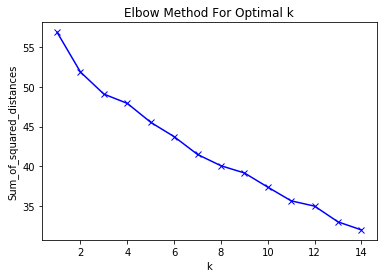

In [0]:
import matplotlib.pyplot as plt

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

# KMeans

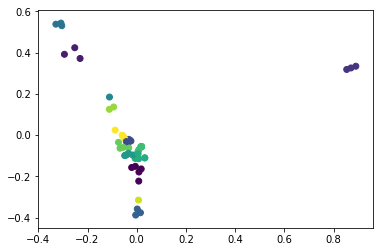

In [0]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize

#splitting into training and test sets
X_train, X_test = train_test_split(norm_corpus, test_size=0.25, random_state=0)

# Normalize the data.
X_norm = normalize(similarity_df)

# Reduce it to two components.
X_pca = PCA(2).fit_transform(X_norm)

# Calculate predicted values.
y_pred = KMeans(n_clusters=14, random_state=42).fit_predict(X_pca)

# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show()

In [0]:
hillary['cluster']=y_pred

In [0]:
hillary_raw = hillary[["ExtractedBodyText",'cluster']]

In [0]:
hillary_raw[hillary_raw['cluster']==0]

,ExtractedBodyText,cluster
7650,I talked w him and will download tomorrow.,0
2335,Jim K. sent in some edits in the middle of the...,0
6290,Yep -- working through them now.,0
4390,We are also bringing the following ngo represe...,0
810,Here are some matters I haven't raised w you b...,0


In [0]:
hillary_raw['cluster'].value_counts()

9     9
8     5
7     5
3     5
0     5
13    4
10    4
5     3
4     3
2     3
1     3
11    2
12    1
6     1
Name: cluster, dtype: int64

In [0]:
hillary_raw.head()

,ExtractedBodyText,cluster
2164,When is Steinberg call?,5
3440,"Tamera, we are so excited you are keeping trad...",9
7028,Thx but did you see the photos of my shoe fall...,3
6475,That was original plan but I changed it last n...,10
2,Thx,13


# 17 clusters

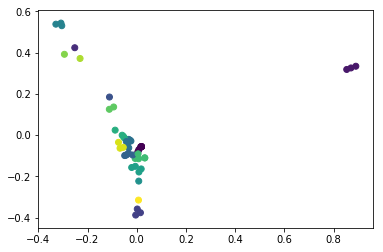

In [0]:
# Normalize the data.
X_norm = normalize(similarity_df)

# Reduce it to two components.
X_pca = PCA(2).fit_transform(X_norm)

# Calculate predicted values.
y_pred_1 = KMeans(n_clusters=17, random_state=42).fit_predict(X_pca)

# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred_1)

In [0]:
hillary['cluster']=y_pred_1

In [0]:
hillary_raw = hillary[["ExtractedBodyText",'cluster']]

In [0]:
hillary_raw['cluster'].value_counts()

0     9
6     6
11    5
5     5
10    4
9     4
3     3
1     3
15    3
7     3
12    2
2     1
16    1
4     1
13    1
14    1
8     1
Name: cluster, dtype: int64

In [0]:
hillary_raw[hillary_raw['cluster']==0]

,ExtractedBodyText,cluster
3440,"Tamera, we are so excited you are keeping trad...",0
2239,Aren't I lucky?,0
7685,Correct to reflect Kuwaiti not Qatari FM.,0
2882,"Yes, and we can certainly do",0
602,I reed the two books for the SED but nothing f...,0
2232,What's the full story on this?,0
7328,"graduate,-howard-university-student-beats-the-...",0
1884,Roger on all counts.,0
431,How will we set any expectations? Did anyone b...,0


In [0]:
hillary_raw[hillary_raw['cluster']==6]

,ExtractedBodyText,cluster
7028,Thx but did you see the photos of my shoe fall...,6
6475,That was original plan but I changed it last n...,6
6075,III let lauren handle\nOps can schedule menend...,6
7899,Two notes on reporters who'll be in our small ...,6
525,What does Jim say? Tom Shannon? Dan Restrepo?,6
4107,So nice - congrats to you and thanks for all t...,6


# 20 Clusters

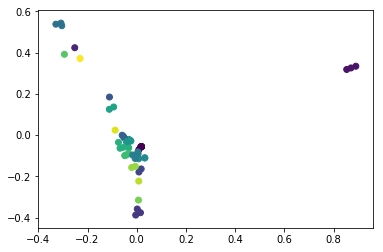

In [0]:
# Normalize the data.
X_norm = normalize(similarity_df)

# Reduce it to two components.
X_pca = PCA(2).fit_transform(X_norm)

# Calculate predicted values.
y_pred_2 = KMeans(n_clusters=20, random_state=42).fit_predict(X_pca)

# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred_2)

In [0]:
hillary['cluster']=y_pred_2

In [0]:
hillary_raw = hillary[["ExtractedBodyText",'cluster']]

In [0]:
hillary_raw['cluster'].value_counts()

0     8
10    5
13    4
12    4
8     4
1     3
3     3
6     3
7     3
9     3
11    2
4     2
16    2
18    1
14    1
15    1
5     1
2     1
17    1
19    1
Name: cluster, dtype: int64

In [0]:
hillary_raw[hillary_raw['cluster']==18]

,ExtractedBodyText,cluster
2,Thx,18


In [0]:
hillary_raw[hillary_raw['cluster']==0]

,ExtractedBodyText,cluster
3440,"Tamera, we are so excited you are keeping trad...",0
2239,Aren't I lucky?,0
7685,Correct to reflect Kuwaiti not Qatari FM.,0
2882,"Yes, and we can certainly do",0
602,I reed the two books for the SED but nothing f...,0
2232,What's the full story on this?,0
7328,"graduate,-howard-university-student-beats-the-...",0
1884,Roger on all counts.,0


In [0]:
hillary_raw[hillary_raw['cluster']==10]

,ExtractedBodyText,cluster
7028,Thx but did you see the photos of my shoe fall...,10
6075,III let lauren handle\nOps can schedule menend...,10
7899,Two notes on reporters who'll be in our small ...,10
525,What does Jim say? Tom Shannon? Dan Restrepo?,10
4107,So nice - congrats to you and thanks for all t...,10


# Document Similarity

In [0]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity(tv_matrix)
similarity_df = pd.DataFrame(similarity_matrix)
similarity_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52
0,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.197755,0.0,0.178157,0.000000,0.227555,0.000000,0.000000,0.0,0.000000,0.205710,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.140566,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.0,1.000000,0.000000,0.217707,0.000000,0.000000,0.000000,0.0,0.000000,0.064468,0.047590,0.000000,0.021712,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.015484,0.000000,0.000000,0.000000,0.043412,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.018501,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.0,0.000000,1.000000,0.000000,0.049233,0.000000,0.042583,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.097682,0.0,0.000000,0.000000,0.000000,0.063381,0.054850,0.000000,0.000000,0.059232,0.000000,0.000000,0.000000,0.053031,0.000000,0.000000,0.000000,0.000000,0.038853,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.090691,0.0,0.000000,0.019049,0.000000,0.054888,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.0,0.217707,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.296123,0.218597,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.0,0.000000,0.049233,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.054561,0.000000,0.059475,0.0,0.000000,0.000000,0.000000,0.0,0.039508,0.069788,0.000000,0.097607,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.051961,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.096249,0.000000,0.051248,0.000000,0.0,0.000000,0.018665,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.077340,0.000000,0.000000,0.000000,0.064775,0.0,0.000000,0.000000,0.000000,0.0,0.105905,0.054178,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.097119,0.000000,0.000000,0.000000,0.000000,0.047884,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.024380,0.189015,0.000000,0.000000,0.000000,0.000000,0.072808
7,0.197755,0.0,0.000000,0.042583,0.000000,0.000000,0.000000,1.000000,0.0,0.105442,0.000000,0.134678,0.000000,0.000000,0.0,0.000000,0.121749,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.108082,0.000000,0.000000,0.000000,0.083194,0.000000,0.000000,0.000000,0.062673,0.000000,0.000000,0.000000,0.032927,0.045750,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

# Hierarchical Clustering

In [0]:

from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(similarity_matrix, 'ward')
pd.DataFrame(Z, columns=['Document\Cluster 1', 'Document\Cluster 2', 
                         'Distance', 'Cluster Size'], dtype='object')

,Document\Cluster 1,Document\Cluster 2,Distance,Cluster Size
0,24,33,0.365789,2
1,39,53,0.728352,3
2,15,21,0.758946,2
3,19,32,1.01336,2
4,4,10,1.03323,2
5,45,50,1.06232,2
6,20,49,1.06679,2
7,9,16,1.06846,2
8,37,51,1.09343,2
9,0,11,1.13486,2


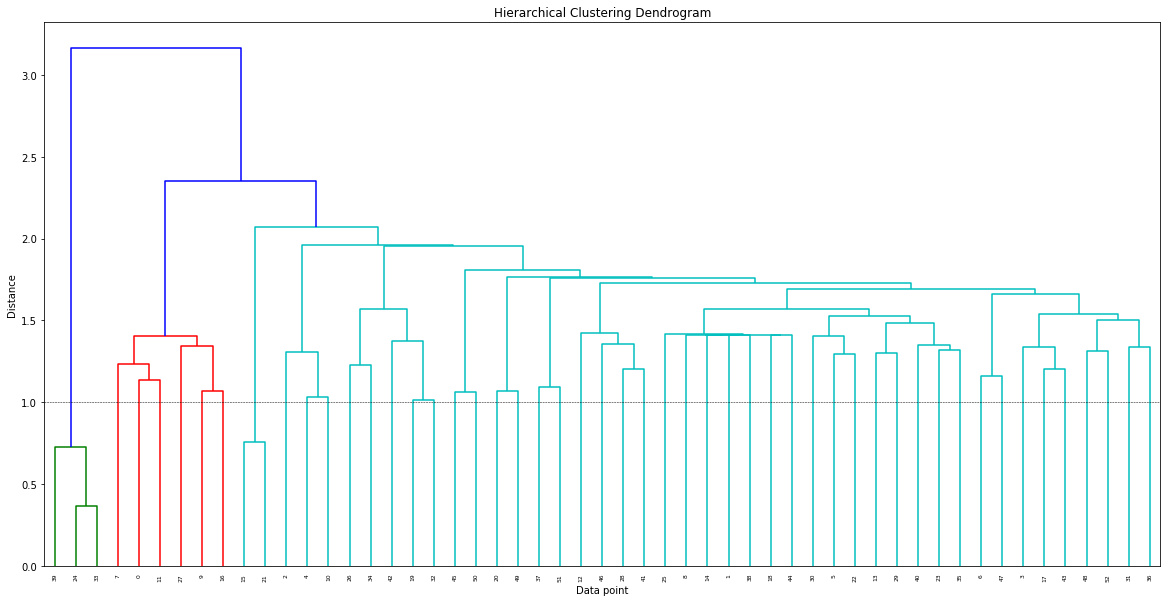

In [0]:

plt.figure(figsize=(20, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data point')
plt.ylabel('Distance')
dendrogram(Z)
plt.axhline(y=1.0, c='k', ls='--', lw=0.5)




# Random Forest - BOW

In [0]:
# Y is the clusters and X is all terms contained inside the document term matrix
Y = y_pred_2
X_bow = dtm_bow

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X_bow, 
                                                    Y,
                                                    test_size=0.25,
                                                    random_state=0)

In [0]:
from sklearn import ensemble

rfc = ensemble.RandomForestClassifier()


train = rfc.fit(X_train, y_train)

print('Training set score:', rfc.score(X_train, y_train))
print('\nTest set score:', rfc.score(X_test, y_test))

Training set score: 1.0

Test set score: 0.07142857142857142


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


# Random Forest with N-Grams

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X_ngram, 
                                                    Y,
                                                    test_size=0.25,
                                                    random_state=0)

In [0]:
train = rfc.fit(X_train, y_train)

print('Training set score:', rfc.score(X_train, y_train))
print('\nTest set score:', rfc.score(X_test, y_test))

Training set score: 0.9487179487179487

Test set score: 0.07142857142857142


# Random Forest with TF-IDF

In [0]:
#in prior cell I have been changing my dtm to an X variable.  But they are equivalent to the dtm(s). So in this code
#In the train test split, my X is just dtm
X_train, X_test, y_train, y_test = train_test_split(dtm_tfidf, 
                                                    Y,
                                                    test_size=0.25,
                                                    random_state=0)

In [0]:
train = rfc.fit(X_train, y_train)

print('Training set score:', rfc.score(X_train, y_train))
print('\nTest set score:', rfc.score(X_test, y_test))

Training set score: 0.9487179487179487

Test set score: 0.21428571428571427


# SVM BOW

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X_bow, 
                                                    Y,
                                                    test_size=0.25,
                                                    random_state=0)

In [0]:
from sklearn.svm import SVC

svm = SVC(kernel = 'linear')
train = svm.fit(X_train, y_train)

print('Training set score:', svm.score(X_train, y_train))
print('\nTest set score:', svm.score(X_test, y_test))

Training set score: 1.0

Test set score: 0.21428571428571427


# SVM N-Grams

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X_ngram, 
                                                    Y,
                                                    test_size=0.25,
                                                    random_state=0)

In [0]:
train = svm.fit(X_train, y_train)

print('Training set score:', svm.score(X_train, y_train))
print('\nTest set score:', svm.score(X_test, y_test))

Training set score: 0.9487179487179487

Test set score: 0.21428571428571427


# Logistic Regression with N-Grams

In [0]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
train = lr.fit(X_train, y_train)

print('Training set score:' , lr.score(X_train, y_train))
print('\nTest set score:' , lr.score(X_test, y_test))

Training set score: 0.9743589743589743

Test set score: 0.21428571428571427


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


# Logistic Regression with BOW

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X_bow, 
                                                    Y,
                                                    test_size=0.25,
                                                    random_state=0)

In [0]:
train = lr.fit(X_train, y_train)

print('Training set score:' , lr.score(X_train, y_train))
print('\nTest set score:' , lr.score(X_test, y_test))

Training set score: 1.0

Test set score: 0.21428571428571427


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
